In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/ALL/drive/*.csv")
sample_name2 = file_list("./data/ALL/FOV/*.csv")
sample_name3 = file_list("./data/ALL/temp/*.csv")

print(sample_name1)
print(sample_name2)
print(sample_name3)

i, j ,k = 33, 33, 33

['./data/ALL/drive\\2022-11-01-20-09-02_3v58.csv', './data/ALL/drive\\2022-11-02-15-23-42_3v58.csv', './data/ALL/drive\\2022-11-21-12-58-24_VT2030108.csv', './data/ALL/drive\\2022-11-21-14-37-25_V12030108.csv', './data/ALL/drive\\2022-11-21-15-50-38_V22030108.csv', './data/ALL/drive\\2022-11-21-18-32-43_V32030108.csv', './data/ALL/drive\\2022-11-22-10-30-10_VT2010508.csv', './data/ALL/drive\\2022-11-22-11-43-24_V22010508.csv', './data/ALL/drive\\2022-11-22-13-34-10_V32010508.csv', './data/ALL/drive\\2022-11-22-15-19-01_V42010508.csv', './data/ALL/drive\\2022-11-24-16-35-00_VT2020809.csv', './data/ALL/drive\\2022-11-24-19-17-50_V12020809.csv', './data/ALL/drive\\2022-11-24-20-48-08_V22020809.csv', './data/ALL/drive\\2022-11-25-15-19-23_V42020809.csv', './data/ALL/drive\\2022-11-29-15-41-36_VT2030608.csv', './data/ALL/drive\\2022-11-29-19-05-01_V22030608.csv', './data/ALL/drive\\2022-11-30-12-20-51_VT2030508.csv', './data/ALL/drive\\2022-11-30-15-08-13_V12030508.csv', './data/ALL/drive\\

In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

12-05-16-10-14_VT2020809


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,delay_pp_slow,delay_pp_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/12/05 16:10:17,31.259155,26.886826,493656.0,837316.0,3513.124093,539.417369,0.0,0.0,3.248370e+15,1.619504e+15,15.0,14.2
1,2022/12/05 16:10:18,31.240845,26.926880,491589.0,843959.0,3687.233426,540.193698,0.0,0.0,3.248380e+15,1.619509e+15,15.0,14.2
2,2022/12/05 16:10:20,31.246948,26.908188,490382.0,840353.0,3719.990877,541.254043,0.0,0.0,3.248377e+15,1.619508e+15,15.0,14.2
3,2022/12/05 16:10:22,31.225586,26.908188,492359.0,837837.0,3710.046921,544.652770,0.0,0.0,3.248372e+15,1.619505e+15,15.0,14.2
4,2022/12/05 16:10:23,31.239319,26.884155,490758.0,841056.0,3695.326869,539.197724,0.0,0.0,3.248367e+15,1.619503e+15,15.0,14.2


In [4]:
# file
file_drive =  sample_name2[j]
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/12/05 16:10:36,-27.188208,28.178219,55.366427,-18.286784,19.065469,37.352253
1,2022/12/05 16:10:37,-27.188208,28.221746,55.409954,-18.286784,19.065469,37.352253
2,2022/12/05 16:10:38,-27.188208,28.221746,55.409954,-18.286784,19.065469,37.352253
3,2022/12/05 16:10:39,-27.188208,28.178219,55.366427,-18.286784,19.065469,37.352253
4,2022/12/05 16:10:40,-27.188208,28.178219,55.366427,-18.286784,19.065469,37.352253


In [5]:
#file
file_drive = sample_name3[k]
df3 = pd.read_csv(file_drive, index_col=0)
df3.head()

,Time,set_temperature,temperature,param1,param2,param3,param4
0,2022/12/05 16:08:38,25.0,23.847292,976.0,57.635390,0.001447,918.571071
1,2022/12/05 16:08:39,25.0,23.758913,338.0,62.054369,0.126983,276.030722
2,2022/12/05 16:08:40,25.0,24.024166,268.0,48.791682,0.242023,219.815516
3,2022/12/05 16:08:41,25.0,24.467055,146.0,26.647229,0.321202,119.377489
4,2022/12/05 16:08:42,25.0,25.088927,-23.0,-4.446339,0.339234,-19.545148


In [6]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time3 = pd.to_datetime(df3["Time"]) 
time3 = time3.dt.round("s")
time3[len(time3)-1]

Timestamp('2022-12-05 17:34:58')

In [7]:
def pp(data):
    return np.ptp(data)/ np.average(data) * 100

def rms(data):
    return np.std(data)/ np.average(data) * 100

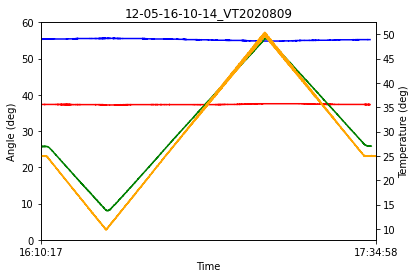

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,60)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"]/10, color='b')


Text(0.03, 0.9, 'rms:  0.43 (%)')

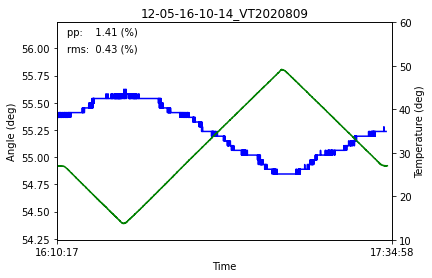

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])

ymin = round(np.average(df2["2x"]), 2) - 1
ymax = round(np.average(df2["2x"]), 2) + 1

ax1.set_ylim(ymin,ymax)
ax2.set_ylim(10,60)

"""
time_reject = np.where(df2["2x"] > 60)
for t in time_reject[0]:
    df2["2x"][t] = df2["2x"][t+1]
"""

ax1.plot(time2, df2["2x"], color='b')
#ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
#ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')


ax1.text(0.03, 0.98, "pp:    {:.2f} (%)".format(round(pp(df2["2x"]), 3)),\
        verticalalignment='top', transform=ax1.transAxes)
ax1.text(0.03, 0.90, "rms:  {:.2f} (%)".format(round(rms(df2["2x"]), 3)),\
        verticalalignment='top', transform=ax1.transAxes)

Text(0.03, 0.9, 'rms:  0.26 (%)')

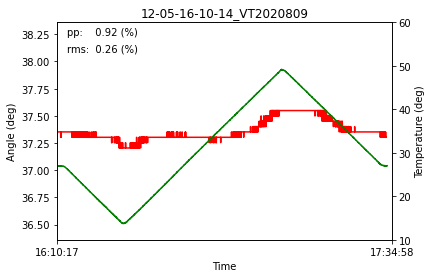

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])

ymin = round(np.average(df2["2y"]), 2) - 1
ymax = round(np.average(df2["2y"]), 2) + 1

ax1.set_ylim(ymin,ymax)
ax2.set_ylim(10,60)

"""
time_reject = np.where(df2["2y"] > 37)
for t in time_reject[0]:
    df2["2y"][t] = df2["2y"][t+1]
"""
#ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
#ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')

ax1.text(0.03, 0.98, "pp:    {:.2f} (%)".format(round(pp(df2["2y"]), 3)),\
        verticalalignment='top', transform=ax1.transAxes)
ax1.text(0.03, 0.90, "rms:  {:.2f} (%)".format(round(rms(df2["2y"]), 3)),\
        verticalalignment='top', transform=ax1.transAxes)

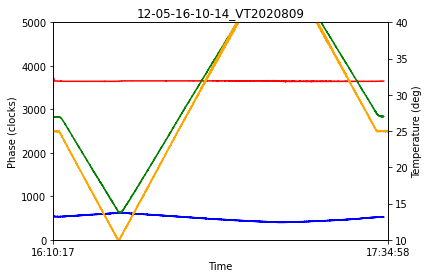

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]
plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')

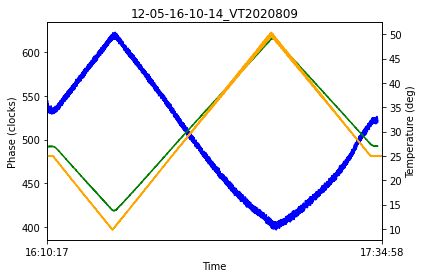

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(100, 300)
#ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
#ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')

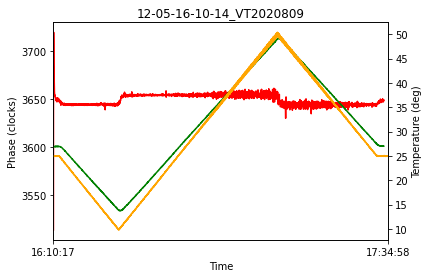

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(3800,4000)
#ax2.set_ylim(10,40)

#ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')

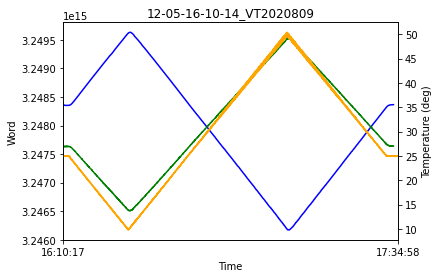

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(3.242e15,3.245e15)
#ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_word"], color='b')
#ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')

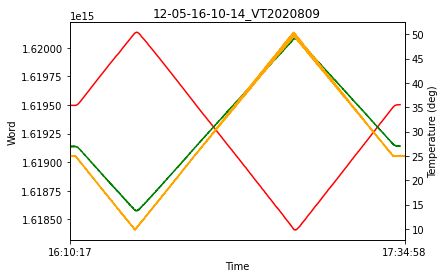

In [15]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(1.619e15,1.621e15)
#ax2.set_ylim(10,40)

#ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')
ax2.plot(time3, df3["temperature"], color='orange')
#ax2.plot(time3, df3["set_temperature"], color='b')

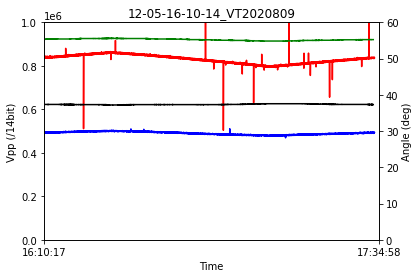

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Vpp (/14bit)")
ax2.set_ylabel("Angle (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax = time3[len(time3)-1]
plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,1000000)
ax2.set_ylim(0,60)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')